In [6]:
import torch
model_path = r'models\model.pth'

model = torch.load(model_path)


In [7]:
# Begin modeling now ! 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim # Optimizers such as SGD, Adam, etc.

# MaxPooling2D: reduces the spatial dimensions of the output volume
# Conv2D: applies a 2D convolution over an input signal
# Dense: fully connected layer
# Flatten: flattens the input -> used to convert a 2D matrix into a vector
# Dropout: applies dropout to the input
# ReLU: applies the rectified linear unit activation function (keeps only positive values)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

Model loaded from models\model.pth


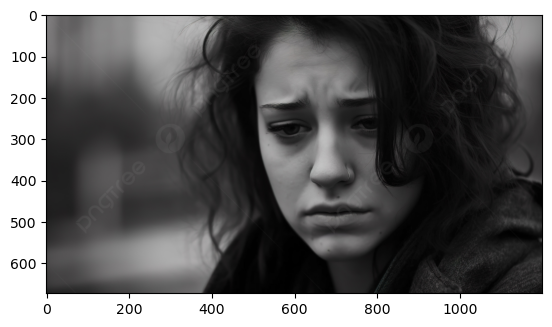

Prediction: 0.6192477941513062
The model predicts: Sad


In [9]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvNet().to(device)
model.eval()
print(f"Model loaded from {model_path}")

# Load and display the image
img_path = r'data\sad\pngtree-woman-looking-sad-in-black-and-white-picture-image_2770858.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Convert the NumPy array image to a PIL image
img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Define the transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transform
img_transformed = transform(img_pil)

# Expand dimensions to match the input shape required by the model
img_transformed = img_transformed.unsqueeze(0).to(device)

# Make a prediction using the loaded model
with torch.no_grad():
    yhat = model(img_transformed)
    prediction = torch.sigmoid(yhat).item()

print(f"Prediction: {prediction}")

# Display the prediction
if prediction > 0.5:
    print("The model predicts: Sad")
else:
    print("The model predicts: Happy")